#### Import some necessary libraries for this project 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

#### Import Data from a CSV file

In [2]:
project = pd.read_csv('C:/Data Analyst/Personal Project/Python_Data.csv', header = 0)

#### This is the data of the Jelwery store for some sold products. 
* It's including product type, , unit sold per product and factors of customer satisfactions (price, number of customers who leave the rating after purchasing, and the overall ratings)
* This table is the extension of the Customers table that was analyzed in the SQL commands Project.
* Overall ratings are the average of products, services, and delivery ratings. 

In [3]:
project

,unit_sold,price,overall_rate,number_reviewers,product_type
0,45,251000,4.9,23,anklet
1,16,268000,4.6,3,earrings
2,43,272000,4.8,20,earrings
3,19,273000,4.5,11,chain
4,31,278000,4.8,15,pendant
5,4,300000,4.0,1,charm
6,4,315000,4.5,2,charm
7,22,315000,5.0,10,earrings
8,4,318000,4.0,1,earrings
9,19,325000,4.8,6,earrings


#### Analysing the relationships between variables

In [4]:
project.corr()

,unit_sold,price,overall_rate,number_reviewers
unit_sold,1.000000,-0.394726,0.422823,0.920979
price,-0.394726,1.000000,0.179017,-0.302263
overall_rate,0.422823,0.179017,1.000000,0.400293
number_reviewers,0.920979,-0.302263,0.400293,1.000000


### Results:
* Unit_sold is the dependent variable because we want to analyze which factors can improve the unit sold of each product
* For the single relationship between price and unit_sold. If other factors are the same, the correlation of price and unit_sold is - 0.394726 means: if we increase the price of product by 1 unit, the unit_sold will be decreased by 0.394726 unit
* The same explanation with the impact of overall ratings and number of reviewers into sales.
* The correlation between independent variables is small (<0.5). Therefore, there is no impact of the multicollinearity

#### Creating Multi linear Regression Model and drawing the graph to see their relationships
* Import statsmodels.API

In [5]:
import statsmodels.api as sn

In [6]:
y_multi = project['unit_sold']

#### Product_type is not used in this analysis, therefore, we need to delete it from the data

In [7]:
project_new = project.drop('product_type', axis = 1)

In [8]:
x_multi= project_new.drop('unit_sold', axis = 1)

In [9]:
x_multi_cons=sn.add_constant(x_multi)

In [10]:
lm_multi = sn.OLS(y_multi, x_multi_cons).fit()

In [14]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              unit_sold   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     107.0
Date:                Sun, 26 Feb 2023   Prob (F-statistic):           9.28e-21
Time:                        18:22:19   Log-Likelihood:                -137.39
No. Observations:                  50   AIC:                             282.8
Df Residuals:                      46   BIC:                             290.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6279      3.148      0.199      0.843      -5.709       6.965
price            -1.028e-05   3.54e-06     -2.904      0.006   -1.74e-05   -3.15e-06
overall_rate         1.5545      0.754      2.061      0.045       0.036       3.073
number_reviewers     1.6105      0.123     13.096      0.000       1.363       1.858
==============================================================================
Omnibus:                        9.827   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.894
Skew:                          -0.677   Prob(JB):                      0.00261
Kurtosis:                       4.969   Cond. No.                     2.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Reject the constant because it is insignificant due to its probability in the 95% confidence interval (0.843 > 0.05).
#### The regression model will be displayed:
* Unit sold = -.0000103* Price + 1.554513* Overall Rating + 1.610542* Number of Reviewers 

#### This model can be used to predict the unit sold of each product. We can adjust the price or focuse on promotion (discount, freeship...) to improve the number of reviewers who providing feedbacks after purchasing, thus, increasing the number of product that we can sell.


#### See the relationship between dependent and independent variables
* Take Unit_Sold and Price as an example

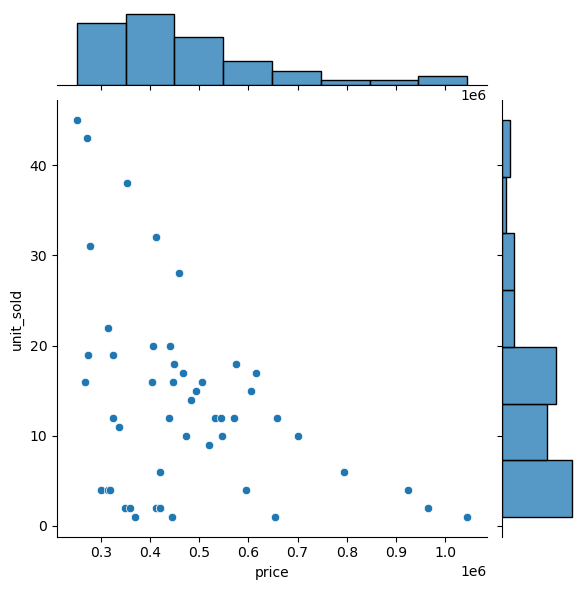

In [13]:
sns.jointplot (x = 'price', y = 'unit_sold', data = project)